In [1]:
%load_ext autoreload
%autoreload 2

In [16]:
import numpy as np
import pickle
from matplotlib import pyplot as plt
from PIL import Image

In [6]:
from python_nn.models import Sequential

In [4]:
from python_nn.layers.dense import Dense
from python_nn.callbacks import Monitor
from python_nn.layers.convolution import ConvLayer1D

In [9]:
new_model = Sequential()

TypeError: 'NoneType' object is not subscriptable

In [46]:
new_model.add_layer(Dense, nodes=10, function='softmax')

In [47]:
new_model.compile(loss_func='entropy', regularizer={'name': 'ridge', 'args': {'lamb': 0}})

In [10]:
def get_batch_file(file_num):
    with open("cifar-10-batches-py/data_batch_" + str(file_num), 'rb') as file:
        d = pickle.load(file, encoding='bytes')
    return d
def print_image(img_array, save_dir=None):
    img_tr = np.uint8(img_array.reshape((3,32,32)).transpose(1,2,0))
    im = Image.fromarray(img_tr, 'RGB').resize((320,320))
    if save_dir:
        im.save(save_dir)
    else:
        im.show()
def val2onehot(val_array, classes):
    labels = np.zeros((len(val_array), classes))
    for ind,lbl in enumerate(val_array):
        labels[ind,lbl] = 1
    return labels

In [11]:
data_1 = get_batch_file(1)
data_2 = get_batch_file(2)
data_3 = get_batch_file(3)
data_4 = get_batch_file(4)
data_5 = get_batch_file(5)

## setting the variables
classes = 10
labels_1 = val2onehot(data_1[b'labels'], classes)
labels_2 = val2onehot(data_2[b'labels'], classes)
labels_3 = val2onehot(data_3[b'labels'], classes)
labels_4 = val2onehot(data_4[b'labels'], classes)
labels_5 = val2onehot(data_5[b'labels'], classes)
inputs_1 = data_1[b'data']
inputs_2 = data_2[b'data']
inputs_3 = data_3[b'data']
inputs_4 = data_4[b'data']
inputs_5 = data_5[b'data']
#inputs_1 = np.concatenate([inputs_1, inputs_4, inputs_5])
#labels_1 = np.concatenate([labels_1, labels_4, labels_5])
mu = np.mean(inputs_1, axis=0)
var = np.sqrt(np.var(inputs_1, axis=0))
inputs_1 = (inputs_1 - mu)/var
inputs_2 = (inputs_2 - mu)/var
inputs_3 = (inputs_3 - mu)/var

In [42]:
monitor = Monitor(inputs_2, labels_2)

In [49]:
#new_model.monitor('val', inputs_2, labels_2)
new_model.train(inputs_1, labels_1, 40, 100, callbacks=[monitor])

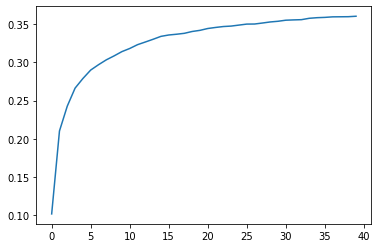

In [32]:
plt.plot(new_model.get_monitor('val')[:,0])

In [20]:
3%np.inf

3.0

In [51]:
res = monitor.pandas()

In [48]:
monitor.clear()

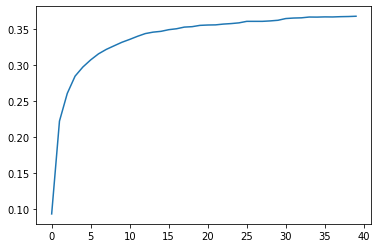

In [53]:
plt.plot(res['epoch'],res['accuracy'])